In [1]:
from scipy import misc, ndimage, signal
from sklearn.model_selection  import train_test_split
import numpy
import numpy as np
import random
import ntpath
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
from tensorflow.keras import optimizers 
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from time import time
import time as tm
import datetime
from operator import itemgetter
import glob
from tensorflow.keras.utils import *
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.utils
from numpy import argmax
import seaborn as sn 

from random import seed
from random import randint
import cv2

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [3]:
#X = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_kmers.npy').astype(np.int16)
#Y = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_kmers_labels.npy').astype(np.int16)

X = np.load('../InpactorDB/InpactorDB_non-redundant+negative.fasta.filtered_center.npy').astype(np.int8)
Y = np.load('../InpactorDB/InpactorDB_non-redundant+negative.fasta.filtered_center_labels.npy').astype(np.int8)

(102128, 5, 29450)
(102128, 1)
(102128, 475, 310)
(102128, 224, 224)
[ 0  1  3  4  8  9 12 13 14 16 17 18 19 20]
61


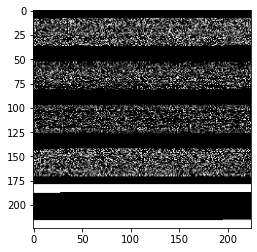

45


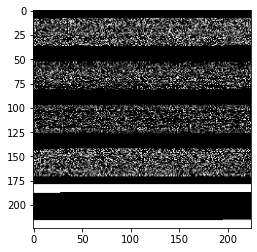

318


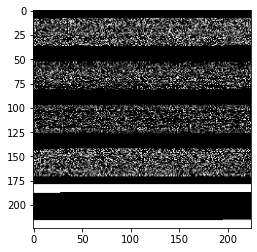

2109


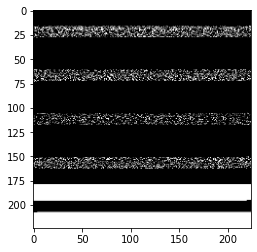

298


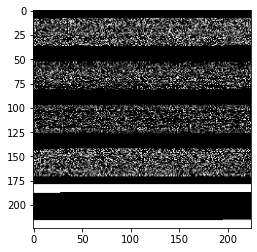

68


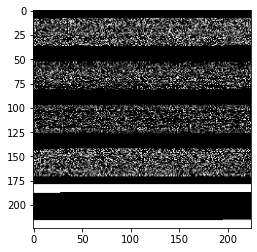

13


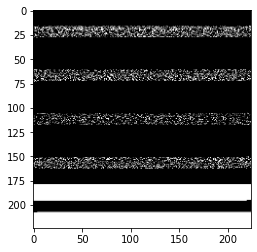

42


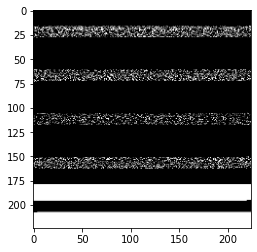

793


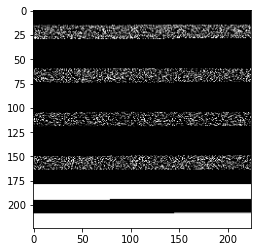

575


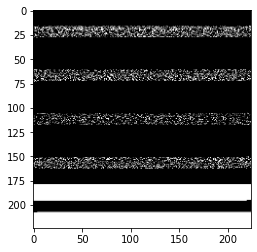

2


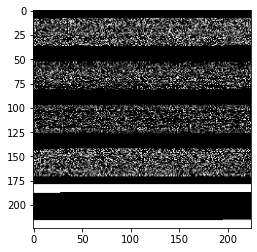

36


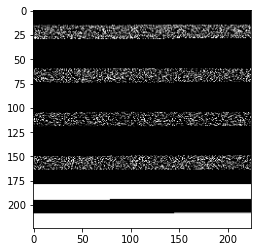

4


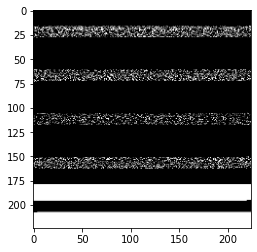

In [4]:
print(X.shape)
print(Y.shape)

X = X.reshape(X.shape[0], 475, -1)
print(X.shape)

X_resized = np.zeros((102128, 224, 224))

for i in range(X.shape[0]):
    X_resized[i] = cv2.resize(X[i].astype('float32'), (224, 224), cv2.INTER_AREA)
    #if X_resized[i].max()!=0:
        #print(X_resized[i].max())
        #X_resized[i] = X_resized[i] / X_resized[i].max()

print(X_resized.shape)

X = X_resized
X_resized = None

type(X[0, 0, 0])

print(np.unique(Y))

"""figure, axes = plt.subplots(nrows=1, ncols=10)
for j in range(10):
    indexes = np.where(Y == 1)
    sel_i = randint(0, len(indexes))
    print(indexes[0][sel_i])
    axes[0, j].imshow(X[sel_i, :, :])

figure.tight_layout()"""

indexes = np.where(Y == 1)
sel_i = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :], cmap='gray')
plt.show()

indexes = np.where(Y == 3)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :], cmap='gray')
plt.show()

indexes = np.where(Y == 4)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :], cmap='gray')
plt.show()

indexes = np.where(Y == 8)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :], cmap='gray')
plt.show()

indexes = np.where(Y == 9)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :], cmap='gray')
plt.show()

indexes = np.where(Y == 12)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :], cmap='gray')
plt.show()

indexes = np.where(Y == 13)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :], cmap='gray')
plt.show()

indexes = np.where(Y == 14)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :], cmap='gray')
plt.show()

indexes = np.where(Y == 16)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :], cmap='gray')
plt.show()

indexes = np.where(Y == 17)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :], cmap='gray')
plt.show()

indexes = np.where(Y == 18)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :], cmap='gray')
plt.show()

indexes = np.where(Y == 19)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :], cmap='gray')
plt.show()

indexes = np.where(Y == 20)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :], cmap='gray')
plt.show()

In [5]:
print(X[0,:,:])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [6]:
"""scalers = {}
feature_vectors_scaler = np.zeros((X.shape[0], X.shape[1], X.shape[2]))
for i in range(X.shape[1]):
    scalers[i] = preprocessing.StandardScaler()
    feature_vectors_scaler[:, i, :] = scalers[i].fit_transform(X[:, i, :]) """

#data split: 80% train, 10% dev and 10% test
validation_size = 0.2
seed = 7
X_train, X_test_dev, Y_train, Y_test_dev = train_test_split(X, Y, test_size=validation_size, random_state=seed)

X_dev, X_test, Y_dev, Y_test = train_test_split(X_test_dev, Y_test_dev, test_size=0.5, random_state=seed)

print(X_train.shape)
print(Y_train.shape)
print(X_dev.shape)
print(Y_dev.shape)
print(X_test.shape)
print(Y_test.shape)

(81702, 224, 224)
(81702, 1)
(10213, 224, 224)
(10213, 1)
(10213, 224, 224)
(10213, 1)


In [7]:
feature_vectors_scaler = None
X = None
Y = None
path_log_base = './logs_CNN'

In [8]:
def metrics(Y_validation,predictions):
    
    classes = len(numpy.unique(Y_validation))
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))
    print('\n confusion matrix:\n',confusion_matrix(Y_validation, predictions))
    #Creamos la matriz de confusión
    snn_cm = confusion_matrix(Y_validation, predictions)

    # Visualizamos la matriz de confusión
    snn_df_cm = pd.DataFrame(snn_cm, range(classes), range(classes))  
    plt.figure(figsize = (20,14))  
    sn.set(font_scale=1.4) #for label size  
    sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
    plt.show()

In [9]:
def train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size, epochs, model_name=""):
    start_time = tm.time()
    log_dir=path_log_base+"/"+model_name+"_"+str(datetime.datetime.now().isoformat()[:19].replace("T", "_").replace(":","-"))
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
    filepath = log_dir+"/saved-model-{epoch:03d}-{val_f1_m:.4f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_f1_m', save_best_only=False, mode='max')
    model.reset_states()
    
    #VALORES EN TRAIN TEST Y VALIDACIÓN INICIALES, GRÁFICOS
    global lossTEST
    global accuracyTEST
    global lossTRAIN
    global accuracyTRAIN
    global lossVALID
    global accuracyVALID
    lossTEST,accuracyTEST   = model.evaluate(X_test, y_test,verbose=None)
    lossTRAIN,accuracyTRAIN = model.evaluate(X_train, y_train,verbose=None)
    lossVALID,accuracyVALID = model.evaluate(X_valid, y_valid,verbose=None)

    global history
    global model_Name
    global log_Dir
    model_Name = model_name
    log_Dir = log_dir
    
    history=model.fit(X_train, y_train, epochs=epochs, 
                      callbacks=[tensorboard,checkpoint], 
                      batch_size=batch_size,validation_data=(X_valid, y_valid),verbose=1)
    
    metrics = model.evaluate(X_test, y_test, verbose=0)
     
    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)
    
    print("\n")
    print(log_dir)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [10]:
def Final_Results_Test(PATH_trained_models):
    global AccTest
    global LossTest
    AccTest = []
    LossTest= [] 
    B_accuracy = 0 #B --> Best
    for filename in sorted(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model = tf.keras.models.load_model(PATH_trained_models+'/'+filename, custom_objects={'f1_m':f1_m})
            loss,accuracy = model.evaluate(X_test, y_test,verbose=0)
            print(f'Loss={loss:.4f} y F1-Score={accuracy:0.4f}'+'\n')
            BandAccTest  = accuracy
            BandLossTest = loss
            AccTest.append(BandAccTest)    #Valores de la precisión en Test, para graficar junto a valid y train
            LossTest.append(BandLossTest)  #Valores de la perdida en Test, para graficar junto a valid y train
            
            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename
    
    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y F1-Score={B_accuracy:0.4f}'+'\n')

In [11]:
def graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID):
    numbers=AccTest
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Test F1-Score {}, Época:{}\n".format(value, index+1))
    
    print("")
    
    numbers=history.history['f1_m']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Train F1-Score {}, Época:{}\n".format(value, index+1))
    
    print("")
    
    numbers=history.history['val_f1_m']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Validation F1-Score {}, Época:{}\n".format(value, index+1))

    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 10))
        #Plot training & validation accuracy values
        plt.plot(np.concatenate([np.array([accuracyTRAIN]),np.array(history.history['f1_m'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyVALID]),np.array(history.history['val_f1_m'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyTEST]),np.array(AccTest)],axis=0)) #Test
        plt.title('F1-Score Vs Epoch')
        plt.ylabel('F1-Score')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.eps', format='eps')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.svg', format='svg')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.pdf', format='pdf')     
        #plt.show()
        
        plt.figure(figsize=(10, 10))
        #Plot training & validation loss values
        plt.plot(np.concatenate([np.array([lossTRAIN]),np.array(history.history['loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossVALID]),np.array(history.history['val_loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossTEST]),np.array(LossTest)],axis=0)) #Test
        plt.title('Loss Vs Epoch')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.eps', format='eps')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.svg', format='svg')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.pdf', format='pdf') 
        plt.show() 

In [12]:
def Final_Results_Test(PATH_trained_models):
    global AccTest
    global LossTest
    AccTest = []
    LossTest= [] 
    B_accuracy = 0 #B --> Best
    for filename in sorted(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model = tf.keras.models.load_model(PATH_trained_models+'/'+filename, custom_objects={'f1_m':f1_m})
            loss,accuracy = model.evaluate(X_test, one_hot_labels_test,verbose=0)
            print(f'Loss={loss:.4f} y F1-Score={accuracy:0.4f}'+'\n')
            BandAccTest  = accuracy
            BandLossTest = loss
            AccTest.append(BandAccTest)    #Valores de la precisión en Test, para graficar junto a valid y train
            LossTest.append(BandLossTest)  #Valores de la perdida en Test, para graficar junto a valid y train
            
            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename
    
    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y F1-Score={B_accuracy:0.4f}'+'\n')

In [13]:
def train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size, epochs, model_name=""):
    start_time = tm.time()
    log_dir=path_log_base+"/"+model_name+"_"+str(datetime.datetime.now().isoformat()[:19].replace("T", "_").replace(":","-"))
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
    filepath = log_dir+"/saved-model-{epoch:03d}-{val_f1_m:.4f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_f1_m', save_best_only=False, mode='max')
    # early stopping
    es = EarlyStopping(monitor='loss', patience=20, mode='min', verbose=1)
    
    model.reset_states()
    
    #VALORES EN TRAIN TEST Y VALIDACIÓN INICIALES, GRÁFICOS
    global lossTEST
    global accuracyTEST
    global lossTRAIN
    global accuracyTRAIN
    global lossVALID
    global accuracyVALID
    lossTEST,accuracyTEST   = model.evaluate(X_test, y_test,verbose=None)
    lossVALID,accuracyVALID = model.evaluate(X_valid, y_valid,verbose=None)
    lossTRAIN,accuracyTRAIN = model.evaluate(X_train, y_train,verbose=None)
    
    global history
    global model_Name
    global log_Dir
    model_Name = model_name
    log_Dir = log_dir
    
    history=model.fit(X_train, y_train, epochs=epochs, 
                      callbacks=[tensorboard,checkpoint,es], 
                      batch_size=batch_size,validation_data=(X_valid, y_valid),verbose=1)
    
    metrics = model.evaluate(X_test, y_test, verbose=0)
     
    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)
    
    print("\n")
    print(log_dir)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [14]:
################################################## 30 SRM FILTERS
srm_weights = np.load('SRM_Kernels1.npy') 
biasSRM=numpy.ones(30)
print (srm_weights.shape)
################################################## TLU ACTIVATION FUNCTION
T3 = 3;
def Tanh3(x):
    tanh3 = K.tanh(x)*T3
    return tanh3
##################################################

(5, 5, 1, 30)


In [15]:
def TERL():
    tf.keras.backend.clear_session()

    # FNN implemented by Nakano

    # Inputs
    inputs = tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2], 1), name="input_1")
    #Layer 1
    layers = tf.keras.layers.Conv2D(30, (5, 5), weights=[srm_weights,biasSRM], strides=(1,1), padding='same', trainable=False, activation=Tanh3, use_bias=True)(inputs)
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=False, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    # layer 1
    layers = tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), activation="relu", use_bias=True)(inputs)
    #layers = tf.keras.layers.SpatialDropout2D(0.5)(layers)
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    layers = tf.keras.layers.AveragePooling2D((3, 3), strides= (1, 1))(layers)
    # layer 2
    layers = tf.keras.layers.Conv2D(32, (5, 5), strides=(2, 2), activation="relu", use_bias=True)(layers)
    #layers = tf.keras.layers.SpatialDropout2D(0.5)(layers)
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    layers = tf.keras.layers.AveragePooling2D((3, 3), strides= (1, 1))(layers)
    # layer 3
    layers = tf.keras.layers.Conv2D(32, (5, 5), strides=(2, 2), activation="relu", use_bias=True)(layers)
    #layers = tf.keras.layers.SpatialDropout2D(0.5)(layers)
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    layers = tf.keras.layers.AveragePooling2D((3,3), strides= (1,1))(layers)
    # layer 3
    layers = tf.keras.layers.Conv2D(16, (5, 5), strides=(2, 2), activation="relu", use_bias=True)(layers)
    #layers = tf.keras.layers.SpatialDropout2D(0.5)(layers)
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    layers = tf.keras.layers.AveragePooling2D((3, 3), strides= (1, 1))(layers)
    # layer 4
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(512,activation="relu")(layers)
    layers = tf.keras.layers.Dense(256,activation="relu")(layers)
    ayers = tf.keras.layers.Dense(128,activation="relu")(layers)
   
    #layers = tf.keras.layers.Dense(200,activation="relu")(layers)#,kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))
    #layers = tf.keras.layers.Dropout(0.5)(layers)
    #layers = tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #layer 2
    #layers = tf.keras.layers.Dense(200,activation="relu")(layers)#,kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layers = tf.keras.layers.Dropout(0.5)(layers)
    #layers = tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #layer 3
    #layers = tf.keras.layers.Dense(200,activation="relu")(layers)#,kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layers = tf.keras.layers.Dropout(0.5)(layers)
    #layers = tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)

    # layer 5
    predictions = tf.keras.layers.Dense(21, activation="softmax", name="output_1")(layers)
    # model generation
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    # optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    # loss function
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    # Compile model
    model.compile(loss=loss_fn, optimizer=opt, metrics=[f1_m])
    return model

In [16]:
model = TERL()
# summarize layers
print(model.summary())
#tf.keras.utils.plot_model(model, show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      1664      
_________________________________________________________________
average_pooling2d (AveragePo (None, 108, 108, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        51232     
_________________________________________________________________
average_pooling2d_1 (Average (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 32)        25632     
_________________________________________________________________
average_pooling2d_2 (Average (None, 21, 21, 32)        0     

In [17]:
one_hot_labels_train = tf.keras.utils.to_categorical(Y_train, num_classes=21)
one_hot_labels_validation = tf.keras.utils.to_categorical(Y_dev, num_classes=21)
one_hot_labels_test = tf.keras.utils.to_categorical(Y_test, num_classes=21)

# Fit the model
epochs = 200
train(model, X_train, one_hot_labels_train, X_dev, one_hot_labels_validation, X_test, one_hot_labels_test, 64, epochs, "TERL")
Final_Results_Test(log_Dir) 

Epoch 1/200
1277/1277 [==============================] - 43s 34ms/step - loss: 1.2407 - f1_m: 0.5223 - val_loss: 1.0617 - val_f1_m: 0.6015
Epoch 2/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.9701 - f1_m: 0.6436 - val_loss: 0.8790 - val_f1_m: 0.6710
Epoch 3/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.8331 - f1_m: 0.7051 - val_loss: 0.7777 - val_f1_m: 0.7210
Epoch 4/200
1277/1277 [==============================] - 44s 34ms/step - loss: 0.7420 - f1_m: 0.7429 - val_loss: 0.7161 - val_f1_m: 0.7502
Epoch 5/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.6726 - f1_m: 0.7699 - val_loss: 0.6280 - val_f1_m: 0.7838
Epoch 6/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.6220 - f1_m: 0.7889 - val_loss: 0.5897 - val_f1_m: 0.7965
Epoch 7/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.5830 - f1_m: 0.8037 - val_loss: 0.5656 - val_f1_m: 0.8092
Epoch 8/200
1277/1277 [====

1277/1277 [==============================] - 43s 34ms/step - loss: 0.1207 - f1_m: 0.9574 - val_loss: 0.8474 - val_f1_m: 0.8446
Epoch 60/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.1232 - f1_m: 0.9568 - val_loss: 0.9071 - val_f1_m: 0.8419
Epoch 61/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.1201 - f1_m: 0.9581 - val_loss: 0.8903 - val_f1_m: 0.8507
Epoch 62/200
1277/1277 [==============================] - 46s 36ms/step - loss: 0.1145 - f1_m: 0.9604 - val_loss: 0.9000 - val_f1_m: 0.8425
Epoch 63/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.1181 - f1_m: 0.9590 - val_loss: 0.9411 - val_f1_m: 0.8406
Epoch 64/200
1277/1277 [==============================] - 44s 34ms/step - loss: 0.1119 - f1_m: 0.9605 - val_loss: 0.9433 - val_f1_m: 0.8397
Epoch 65/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.1167 - f1_m: 0.9597 - val_loss: 0.8783 - val_f1_m: 0.8439
Epoch 66/200
1277/1277 [=========

1277/1277 [==============================] - 44s 34ms/step - loss: 0.0830 - f1_m: 0.9731 - val_loss: 1.2408 - val_f1_m: 0.8437
Epoch 118/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.0847 - f1_m: 0.9725 - val_loss: 1.2587 - val_f1_m: 0.8467
Epoch 119/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.0771 - f1_m: 0.9744 - val_loss: 1.2752 - val_f1_m: 0.8452
Epoch 120/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.0737 - f1_m: 0.9758 - val_loss: 1.2161 - val_f1_m: 0.8394
Epoch 121/200
1277/1277 [==============================] - 44s 34ms/step - loss: 0.0812 - f1_m: 0.9732 - val_loss: 1.3329 - val_f1_m: 0.8292
Epoch 122/200
1277/1277 [==============================] - 44s 34ms/step - loss: 0.0790 - f1_m: 0.9734 - val_loss: 1.2938 - val_f1_m: 0.8343
Epoch 123/200
1277/1277 [==============================] - 44s 34ms/step - loss: 0.0769 - f1_m: 0.9748 - val_loss: 1.2361 - val_f1_m: 0.8411
Epoch 124/200
1277/1277 [==

1277/1277 [==============================] - 43s 34ms/step - loss: 0.0733 - f1_m: 0.9781 - val_loss: 1.5177 - val_f1_m: 0.8395
Epoch 176/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.0678 - f1_m: 0.9786 - val_loss: 1.6179 - val_f1_m: 0.8370
Epoch 177/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.0690 - f1_m: 0.9788 - val_loss: 1.5745 - val_f1_m: 0.8383
Epoch 178/200
1277/1277 [==============================] - 43s 34ms/step - loss: 0.0687 - f1_m: 0.9789 - val_loss: 1.3992 - val_f1_m: 0.8378
Epoch 179/200
1277/1277 [==============================] - 44s 34ms/step - loss: 0.0704 - f1_m: 0.9780 - val_loss: 1.4495 - val_f1_m: 0.8362
Epoch 180/200
1277/1277 [==============================] - 44s 34ms/step - loss: 0.0649 - f1_m: 0.9790 - val_loss: 1.5673 - val_f1_m: 0.8415
Epoch 181/200
1277/1277 [==============================] - 44s 34ms/step - loss: 0.0651 - f1_m: 0.9794 - val_loss: 1.4779 - val_f1_m: 0.8389
Epoch 182/200
1277/1277 [==

Loss=1.2851 y F1-Score=0.8342

saved-model-113-0.8426.hdf5
Loss=1.2546 y F1-Score=0.8409

saved-model-114-0.8420.hdf5
Loss=1.3087 y F1-Score=0.8376

saved-model-115-0.8370.hdf5
Loss=1.1724 y F1-Score=0.8409

saved-model-116-0.8400.hdf5
Loss=1.2481 y F1-Score=0.8417

saved-model-117-0.8437.hdf5
Loss=1.3019 y F1-Score=0.8390

saved-model-118-0.8467.hdf5
Loss=1.2877 y F1-Score=0.8370

saved-model-119-0.8452.hdf5
Loss=1.2862 y F1-Score=0.8421

saved-model-120-0.8394.hdf5
Loss=1.2677 y F1-Score=0.8363

saved-model-121-0.8292.hdf5
Loss=1.3130 y F1-Score=0.8304

saved-model-122-0.8343.hdf5
Loss=1.3033 y F1-Score=0.8310

saved-model-123-0.8411.hdf5
Loss=1.2389 y F1-Score=0.8366

saved-model-124-0.8410.hdf5
Loss=1.3610 y F1-Score=0.8359

saved-model-125-0.8437.hdf5
Loss=1.2882 y F1-Score=0.8428

saved-model-126-0.8414.hdf5
Loss=1.3276 y F1-Score=0.8443

saved-model-127-0.8404.hdf5
Loss=1.2849 y F1-Score=0.8423

saved-model-128-0.8398.hdf5
Loss=1.3527 y F1-Score=0.8353

saved-model-129-0.8406.hd

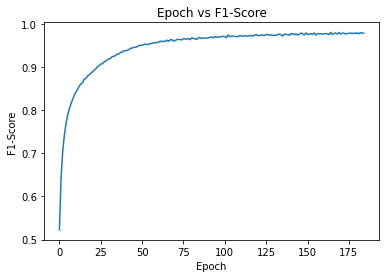

Test F1-Score 0.8524583578109741, Época:18

Test F1-Score 0.852253258228302, Época:26

Test F1-Score 0.8520611524581909, Época:21

Test F1-Score 0.8517612218856812, Época:22

Test F1-Score 0.8516270518302917, Época:20

Test F1-Score 0.8501165509223938, Época:37

Test F1-Score 0.8500446081161499, Época:25

Test F1-Score 0.8496905565261841, Época:27

Test F1-Score 0.8496137857437134, Época:42


Train F1-Score 0.9810569286346436, Época:165

Train F1-Score 0.9805781841278076, Época:170

Train F1-Score 0.9802190661430359, Época:183

Train F1-Score 0.9795070290565491, Época:155

Train F1-Score 0.9794858694076538, Época:150

Train F1-Score 0.9793644547462463, Época:181

Train F1-Score 0.9792473912239075, Época:168

Train F1-Score 0.9791714549064636, Época:147

Train F1-Score 0.9791191220283508, Época:185


Validation F1-Score 0.8537105321884155, Época:36

Validation F1-Score 0.852230429649353, Época:25

Validation F1-Score 0.8516358137130737, Época:26

Validation F1-Score 0.8510624766349792, 

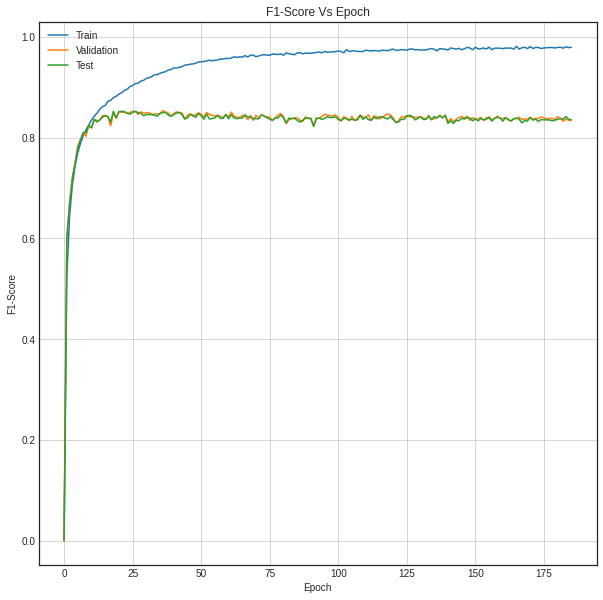

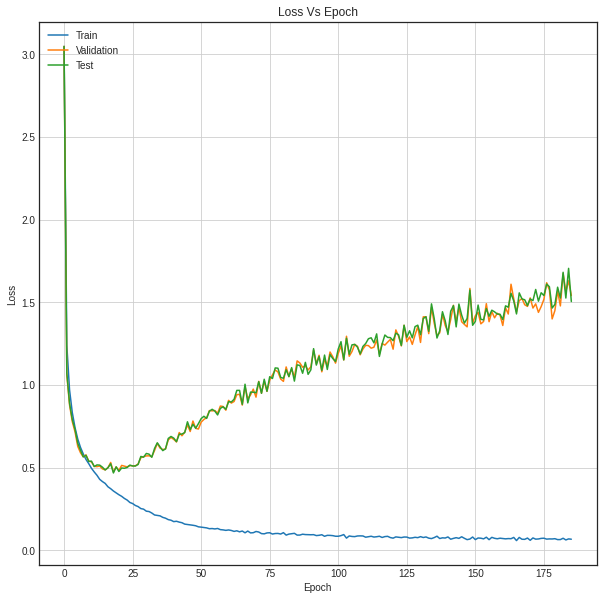

In [18]:
# plot metrics
plt.plot(history.history['f1_m'])
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.title('Epoch vs F1-Score')
plt.show()

#GRÁFICOS DE LAS TRES CURVAS TRAIN TEST Y VALIDACIÓN
graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID)


Baseline Error train: 2.36%
Baseline Error dev: 16.57%
Baseline Error test: 16.44%
Accuracy: 0.9762551712320384
F1 score: 0.9761931897849196
Recall: 0.9762551712320384
Precision: 0.9762910030126172

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     27905
           1       0.98      0.99      0.99      9583
           3       0.94      0.93      0.94      1204
           4       0.97      0.94      0.96      1466
           8       1.00      0.72      0.84        68
           9       0.98      0.98      0.98      2844
          12       0.96      0.94      0.95      4943
          13       0.97      0.95      0.96      2502
          14       0.93      0.96      0.95      1708
          16       0.91      0.94      0.93       432
          17       0.97      0.99      0.98      3577
          18       0.98      0.97      0.98      8258
          19       0.98      0.93      0.96      2821
          20       0

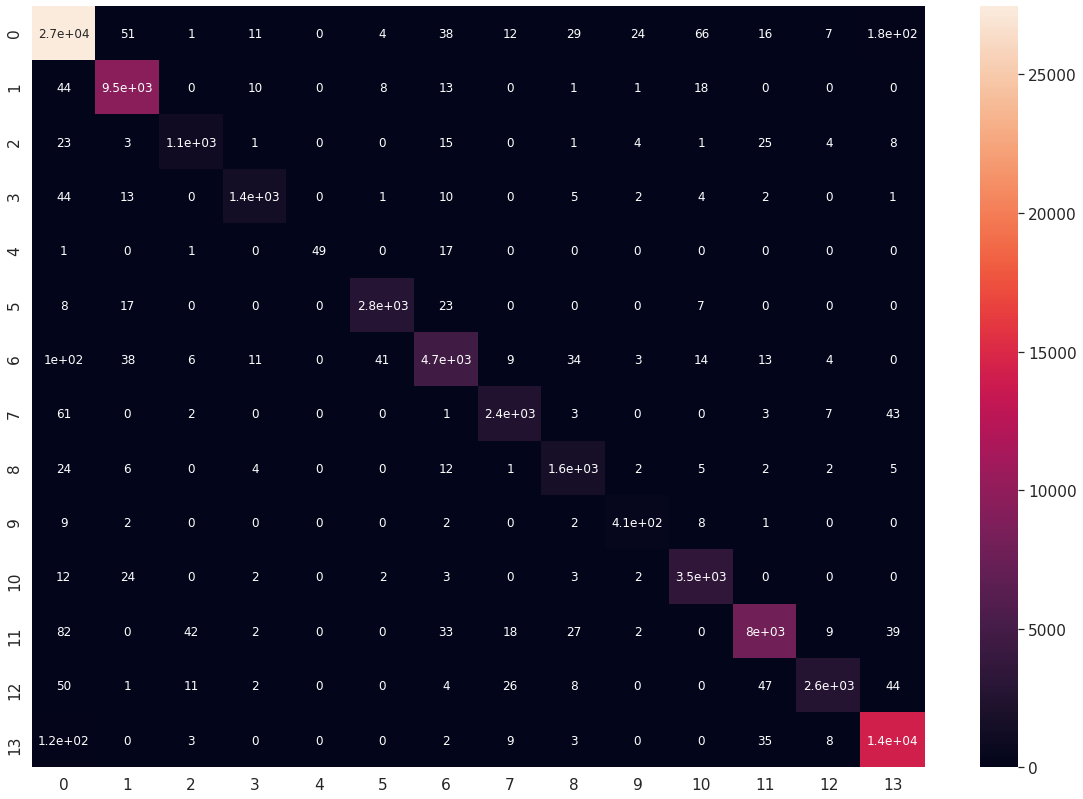

Accuracy: 0.8336433956721825
F1 score: 0.8313154953075972
Recall: 0.8336433956721825
Precision: 0.831316054555161

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      3458
           1       0.86      0.90      0.88      1244
           3       0.58      0.48      0.53       122
           4       0.68      0.54      0.60       188
           8       1.00      0.14      0.25         7
           9       0.85      0.81      0.83       369
          12       0.68      0.67      0.67       616
          13       0.73      0.73      0.73       317
          14       0.57      0.57      0.57       216
          16       0.54      0.41      0.47        51
          17       0.79      0.82      0.80       485
          18       0.83      0.81      0.82      1069
          19       0.81      0.60      0.69       330
          20       0.89      0.93      0.90      1741

    accuracy                           0.83     1

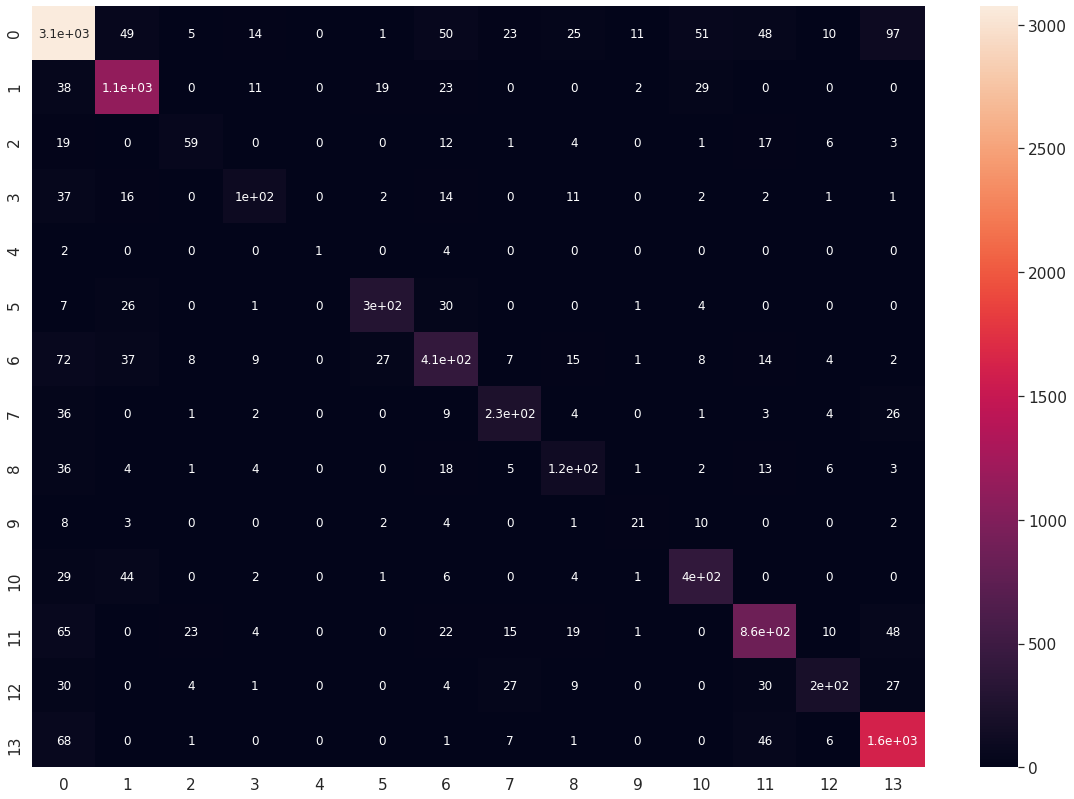

Accuracy: 0.8351121120140996
F1 score: 0.8330257679199934
Recall: 0.8351121120140996
Precision: 0.8320820123599763

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      3460
           1       0.86      0.91      0.88      1204
           3       0.55      0.52      0.53       132
           4       0.69      0.60      0.64       173
           8       0.33      0.11      0.17         9
           9       0.85      0.79      0.82       343
          12       0.72      0.66      0.69       621
          13       0.73      0.73      0.73       311
          14       0.56      0.54      0.55       212
          16       0.56      0.45      0.50        66
          17       0.81      0.81      0.81       470
          18       0.82      0.82      0.82      1069
          19       0.76      0.64      0.69       348
          20       0.90      0.91      0.90      1795

    accuracy                           0.84     

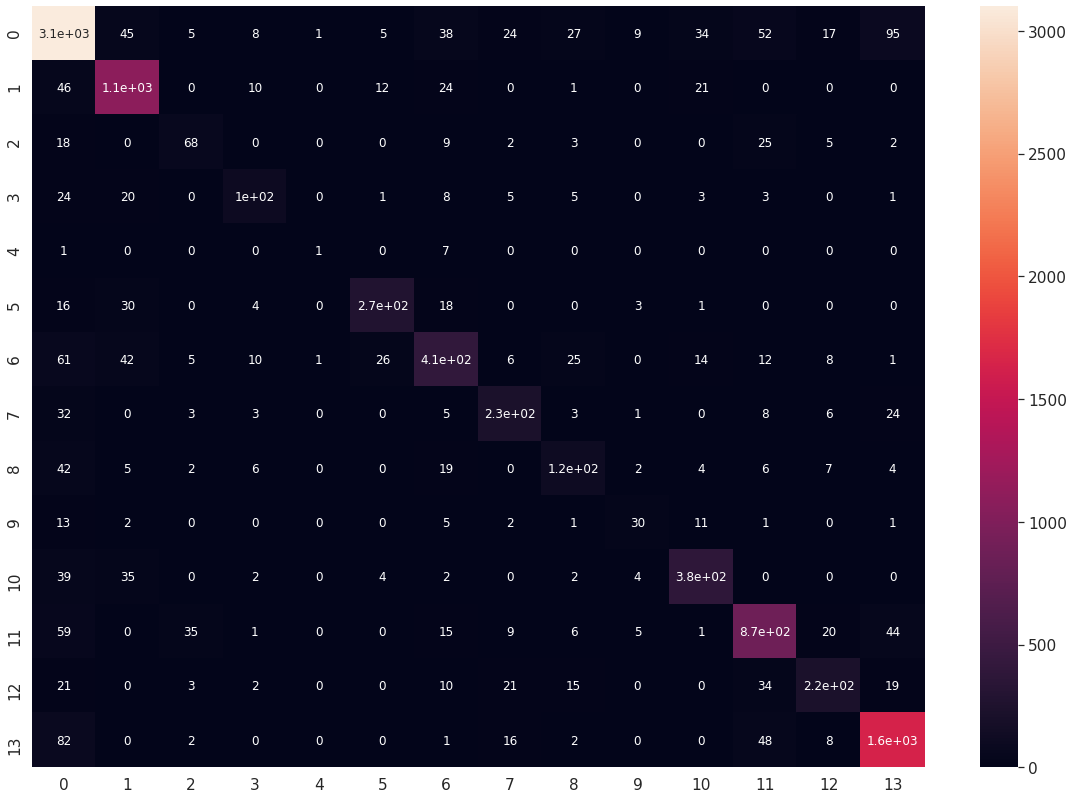

In [19]:
#model = tf.keras.models.load_model(log_Dir+'/saved-model-169-0.9455.hdf5', custom_objects={'f1_m':f1_m})
scores = model.evaluate(X_train, one_hot_labels_train, verbose=0)
print("Baseline Error train: %.2f%%" % (100-scores[1]*100))

scores = model.evaluate(X_dev, one_hot_labels_validation, verbose=0)
print("Baseline Error dev: %.2f%%" % (100-scores[1]*100))

scores = model.evaluate(X_test, one_hot_labels_test, verbose=0)
print("Baseline Error test: %.2f%%" % (100-scores[1]*100))

predictions = model.predict(X_train)

metrics(Y_train, [argmax(x) for x in predictions])

predictions = model.predict(X_dev)

metrics(Y_dev, [argmax(x) for x in predictions])

predictions = model.predict(X_test)

metrics(Y_test, [argmax(x) for x in predictions])